In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
print('Libraries Imported')
from sklearn.model_selection import train_test_split
pd.__version__

Libraries Imported


'1.3.5'

In [2]:
data=pd.read_csv('/content/state_crime.csv') 
data.dataframeName = 'state_crime .csv'
nRow, nCol = data.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 3115 rows and 21 columns


In [3]:
data.head(5)

,State,Year,Data.Population,Data.Rates.Property.All,Data.Rates.Property.Burglary,Data.Rates.Property.Larceny,Data.Rates.Property.Motor,Data.Rates.Violent.All,Data.Rates.Violent.Assault,Data.Rates.Violent.Murder,...,Data.Rates.Violent.Robbery,Data.Totals.Property.All,Data.Totals.Property.Burglary,Data.Totals.Property.Larceny,Data.Totals.Property.Motor,Data.Totals.Violent.All,Data.Totals.Violent.Assault,Data.Totals.Violent.Murder,Data.Totals.Violent.Rape,Data.Totals.Violent.Robbery
0,Alabama,1960,3266740,1035.4,355.9,592.1,87.3,186.6,138.1,12.4,...,27.5,33823,11626,19344,2853,6097,4512,406,281,898
1,Alabama,1961,3302000,985.5,339.3,569.4,76.8,168.5,128.9,12.9,...,19.1,32541,11205,18801,2535,5564,4255,427,252,630
2,Alabama,1962,3358000,1067.0,349.1,634.5,83.4,157.3,119.0,9.4,...,22.5,35829,11722,21306,2801,5283,3995,316,218,754
3,Alabama,1963,3347000,1150.9,376.9,683.4,90.6,182.7,142.1,10.2,...,24.7,38521,12614,22874,3033,6115,4755,340,192,828
4,Alabama,1964,3407000,1358.7,466.6,784.1,108.0,213.1,163.0,9.3,...,29.1,46290,15898,26713,3679,7260,5555,316,397,992


In [4]:
print(len(data))

3115


In [5]:
data.dtypes

State                             object
Year                               int64
Data.Population                    int64
Data.Rates.Property.All          float64
Data.Rates.Property.Burglary     float64
Data.Rates.Property.Larceny      float64
Data.Rates.Property.Motor        float64
Data.Rates.Violent.All           float64
Data.Rates.Violent.Assault       float64
Data.Rates.Violent.Murder        float64
Data.Rates.Violent.Rape          float64
Data.Rates.Violent.Robbery       float64
Data.Totals.Property.All           int64
Data.Totals.Property.Burglary      int64
Data.Totals.Property.Larceny       int64
Data.Totals.Property.Motor         int64
Data.Totals.Violent.All            int64
Data.Totals.Violent.Assault        int64
Data.Totals.Violent.Murder         int64
Data.Totals.Violent.Rape           int64
Data.Totals.Violent.Robbery        int64
dtype: object

In [6]:
data.shape

(3115, 21)

In [7]:
data.isnull().sum()

State                            0
Year                             0
Data.Population                  0
Data.Rates.Property.All          0
Data.Rates.Property.Burglary     0
Data.Rates.Property.Larceny      0
Data.Rates.Property.Motor        0
Data.Rates.Violent.All           0
Data.Rates.Violent.Assault       0
Data.Rates.Violent.Murder        0
Data.Rates.Violent.Rape          0
Data.Rates.Violent.Robbery       0
Data.Totals.Property.All         0
Data.Totals.Property.Burglary    0
Data.Totals.Property.Larceny     0
Data.Totals.Property.Motor       0
Data.Totals.Violent.All          0
Data.Totals.Violent.Assault      0
Data.Totals.Violent.Murder       0
Data.Totals.Violent.Rape         0
Data.Totals.Violent.Robbery      0
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3115 entries, 0 to 3114
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   State                          3115 non-null   object 
 1   Year                           3115 non-null   int64  
 2   Data.Population                3115 non-null   int64  
 3   Data.Rates.Property.All        3115 non-null   float64
 4   Data.Rates.Property.Burglary   3115 non-null   float64
 5   Data.Rates.Property.Larceny    3115 non-null   float64
 6   Data.Rates.Property.Motor      3115 non-null   float64
 7   Data.Rates.Violent.All         3115 non-null   float64
 8   Data.Rates.Violent.Assault     3115 non-null   float64
 9   Data.Rates.Violent.Murder      3115 non-null   float64
 10  Data.Rates.Violent.Rape        3115 non-null   float64
 11  Data.Rates.Violent.Robbery     3115 non-null   float64
 12  Data.Totals.Property.All       3115 non-null   i

In [9]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [10]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

In [11]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  after removing the cwd from sys.path.


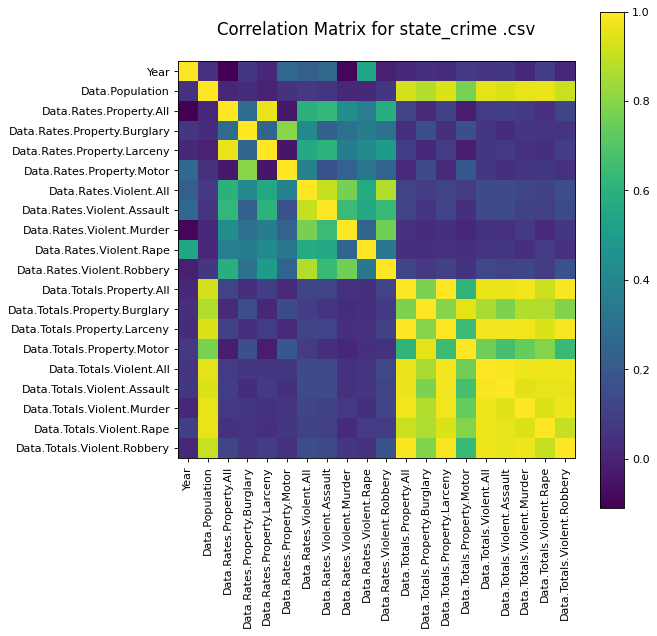

In [12]:
plotCorrelationMatrix(data,8)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  """


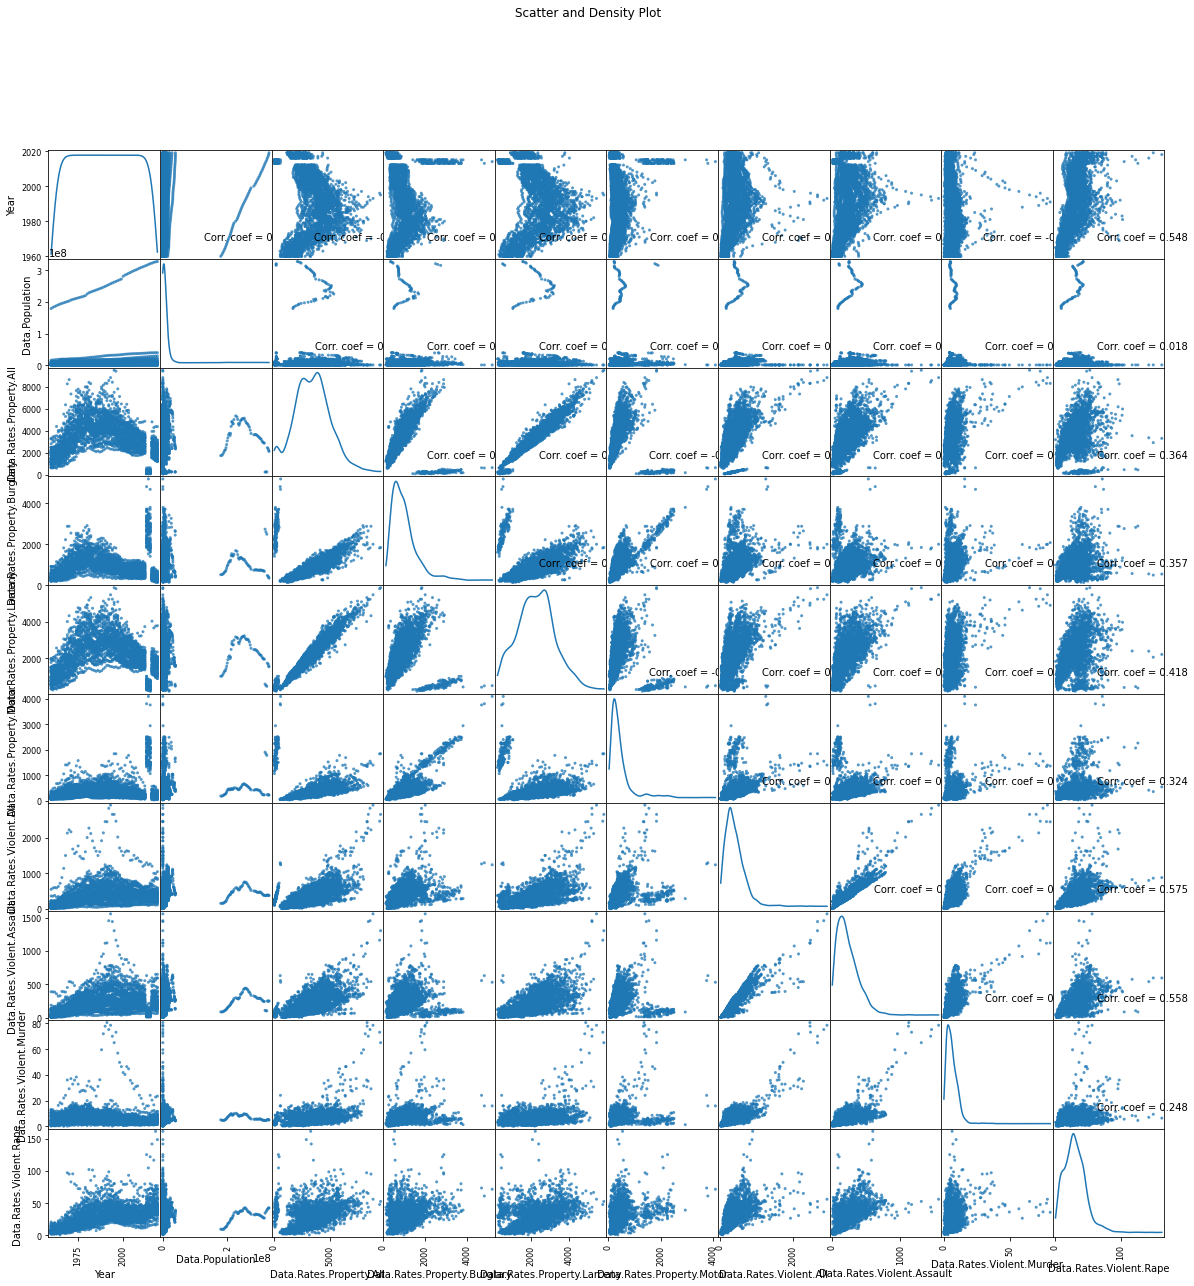

In [13]:
plotScatterMatrix(data,20,10)

In [14]:
print(data.corr())

                                   Year  Data.Population  \
Year                           1.000000         0.050059   
Data.Population                0.050059         1.000000   
Data.Rates.Property.All       -0.109736         0.016567   
Data.Rates.Property.Burglary   0.063776         0.034395   
Data.Rates.Property.Larceny    0.018142         0.002067   
Data.Rates.Property.Motor      0.269713         0.049286   
Data.Rates.Violent.All         0.224697         0.072642   
Data.Rates.Violent.Assault     0.267353         0.060956   
Data.Rates.Violent.Murder     -0.095315         0.016995   
Data.Rates.Violent.Rape        0.547618         0.017843   
Data.Rates.Violent.Robbery    -0.011344         0.068558   
Data.Totals.Property.All       0.015512         0.925284   
Data.Totals.Property.Burglary  0.038469         0.873094   
Data.Totals.Property.Larceny   0.033427         0.943337   
Data.Totals.Property.Motor     0.074561         0.777945   
Data.Totals.Violent.All        0.062184 

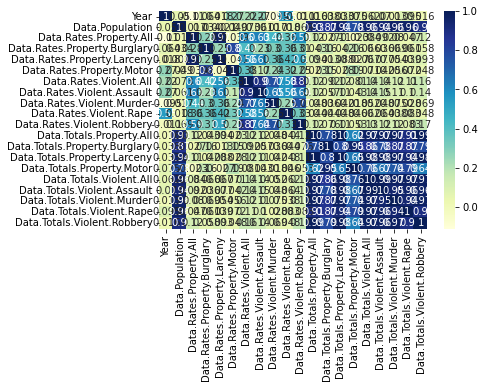

In [15]:
# plotting correlation heatmap
dataplot = sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f60a3f41450>,
      dtype=object)

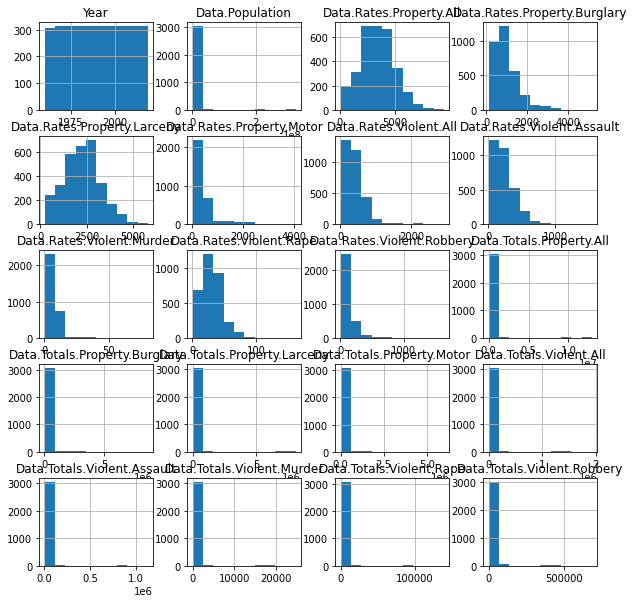

In [16]:
data.hist(figsize = (10,10))

In [17]:
df2=data.iloc[:,17:21]
df2.to_csv('file1.csv')

In [18]:
df1 = pd.read_csv(r"/content/file1.csv", delimiter=',')
df1.dataframeName = 'file1 .csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 3115 rows and 5 columns


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  after removing the cwd from sys.path.


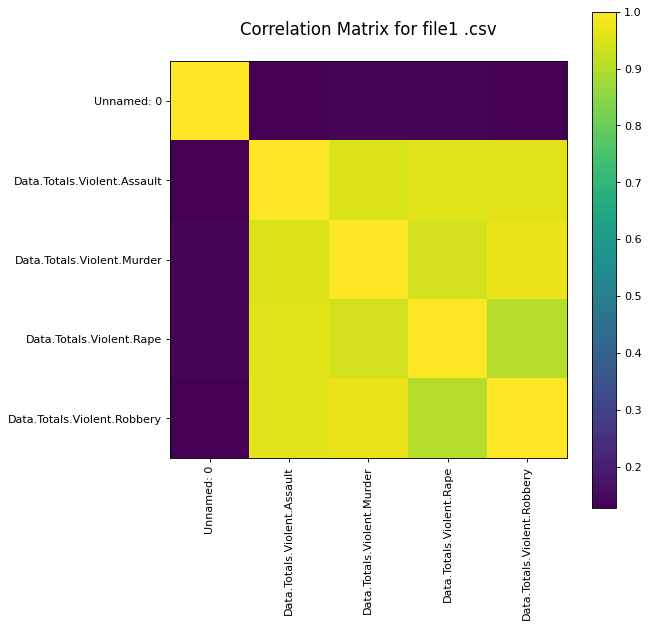

In [19]:
plotCorrelationMatrix(df1,8)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f60a427ddd0>,
      dtype=object)

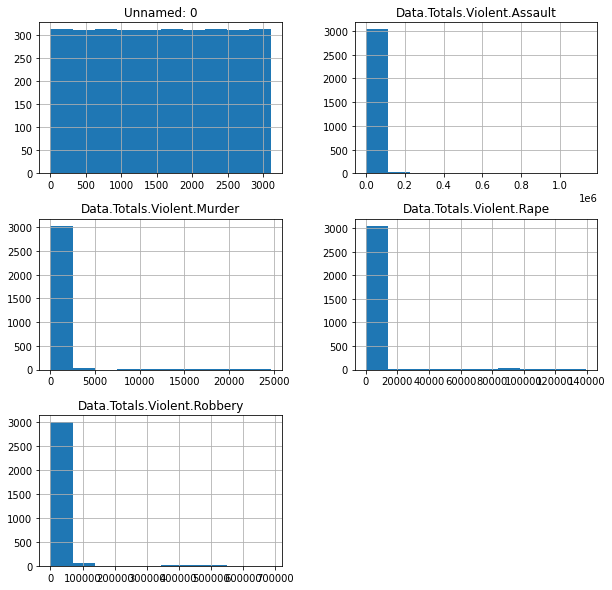

In [20]:
df1.hist(figsize = (10,10))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  """


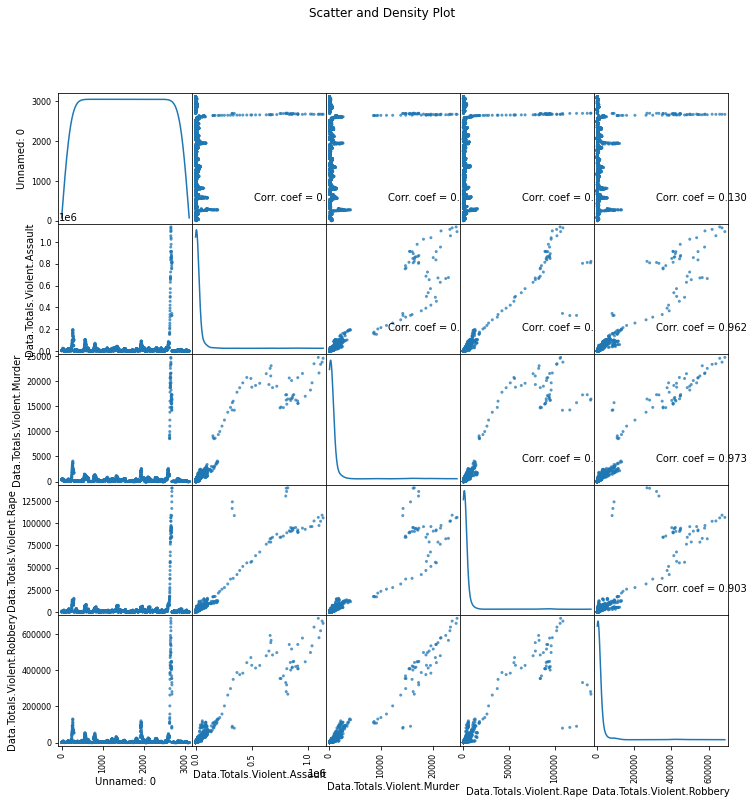

In [21]:
plotScatterMatrix(df1,12,10)

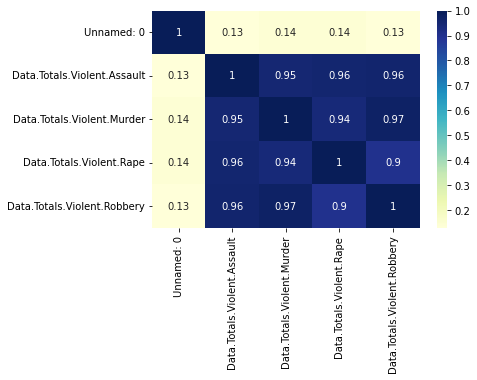

In [22]:
# plotting correlation heatmap
dataplot = sns.heatmap(df1.corr(), cmap="YlGnBu", annot=True)
  


In [23]:
print(df1.corr())

                             Unnamed: 0  Data.Totals.Violent.Assault  \
Unnamed: 0                     1.000000                     0.127878   
Data.Totals.Violent.Assault    0.127878                     1.000000   
Data.Totals.Violent.Murder     0.144500                     0.949437   
Data.Totals.Violent.Rape       0.143869                     0.957487   
Data.Totals.Violent.Robbery    0.129928                     0.962348   

                             Data.Totals.Violent.Murder  \
Unnamed: 0                                     0.144500   
Data.Totals.Violent.Assault                    0.949437   
Data.Totals.Violent.Murder                     1.000000   
Data.Totals.Violent.Rape                       0.940727   
Data.Totals.Violent.Robbery                    0.973166   

                             Data.Totals.Violent.Rape  \
Unnamed: 0                                   0.143869   
Data.Totals.Violent.Assault                  0.957487   
Data.Totals.Violent.Murder               

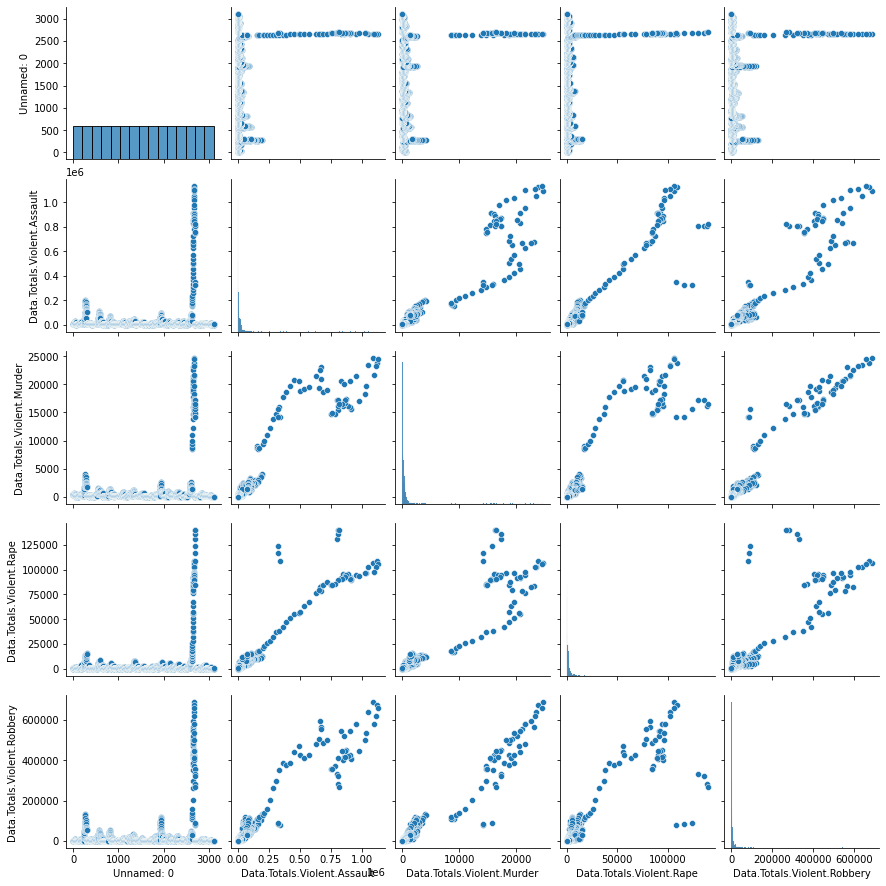

In [24]:
sns.pairplot(df1)

In [25]:
data.describe()

,Year,Data.Population,Data.Rates.Property.All,Data.Rates.Property.Burglary,Data.Rates.Property.Larceny,Data.Rates.Property.Motor,Data.Rates.Violent.All,Data.Rates.Violent.Assault,Data.Rates.Violent.Murder,Data.Rates.Violent.Rape,Data.Rates.Violent.Robbery,Data.Totals.Property.All,Data.Totals.Property.Burglary,Data.Totals.Property.Larceny,Data.Totals.Property.Motor,Data.Totals.Violent.All,Data.Totals.Violent.Assault,Data.Totals.Violent.Murder,Data.Totals.Violent.Rape,Data.Totals.Violent.Robbery
count,3115.000000,3.115000e+03,3115.000000,3115.000000,3115.000000,3115.000000,3115.000000,3115.000000,3115.000000,3115.000000,3115.000000,3.115000e+03,3.115000e+03,3.115000e+03,3.115000e+03,3.115000e+03,3.115000e+03,3115.000000,3115.000000,3115.000000
mean,1989.544141,9.708502e+06,3422.746388,980.836212,2255.336950,427.062504,397.877047,230.235441,6.477207,30.179872,120.786356,3.414501e+05,1.024037e+05,2.196652e+05,4.858270e+04,4.594917e+04,2.580668e+04,663.911717,3034.240449,15175.717817
std,17.299570,3.506750e+07,1575.438156,595.277457,970.917867,412.164938,287.498896,161.647444,5.886449,16.694626,143.516777,1.299392e+06,4.219078e+05,8.294311e+05,2.339655e+05,1.759960e+05,1.013202e+05,2437.666178,11714.612850,59589.454393
min,1960.000000,2.261670e+05,66.900000,126.300000,223.700000,31.100000,9.500000,3.600000,0.200000,0.800000,1.900000,4.320000e+02,7.510000e+02,1.489000e+03,1.940000e+02,3.700000e+01,1.400000e+01,1.000000,6.000000,8.000000
25%,1975.000000,1.279156e+06,2357.650000,561.800000,1575.450000,195.450000,217.200000,112.550000,3.100000,18.500000,37.300000,3.439550e+04,1.017150e+04,2.488000e+04,3.514000e+03,3.318000e+03,1.926000e+03,48.000000,328.000000,788.000000
50%,1990.000000,3.358000e+06,3420.200000,854.300000,2251.300000,315.400000,342.200000,195.800000,5.400000,28.800000,90.400000,1.015400e+05,2.871800e+04,6.743300e+04,1.033900e+04,1.154800e+04,6.378000e+03,186.000000,931.000000,3011.000000
75%,2005.000000,6.082836e+06,4433.900000,1218.200000,2876.900000,481.800000,518.250000,315.450000,8.400000,39.800000,152.200000,2.177235e+05,5.957700e+04,1.427570e+05,2.529950e+04,2.880400e+04,1.694900e+04,464.000000,1930.000000,7840.500000
max,2019.000000,3.282395e+08,9512.100000,5182.500000,5833.800000,4082.300000,2921.800000,1557.600000,80.600000,161.600000,1635.100000,1.296112e+07,8.632512e+06,8.142228e+06,6.004453e+06,1.932274e+06,1.135607e+06,24703.000000,139815.000000,687732.000000


In [26]:
#create a function to find outliers using IQR

def find_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers


In [27]:
#First run fare_amount through the function to return a series of the outliers.

outliers = find_outliers_IQR(data['Data.Population'])
print("number of outliers in Data.Population :"+ str(len(outliers)))
outliers = find_outliers_IQR(data['Data.Rates.Property.All'])
print("number of outliers Data.Rates.Property.All:"+ str(len(outliers)))
outliers = find_outliers_IQR(data['Data.Rates.Property.Larceny'])
print("number of outliers Data.Rates.Property.Larcency:"+ str(len(outliers)))
outliers = find_outliers_IQR(data['Data.Rates.Property.Motor'])
print("number of outliers Data.Rates.Property.Motor:"+ str(len(outliers)))
outliers = find_outliers_IQR(data['Data.Rates.Violent.All'])
print("number of outliers Data.Rates.Violent.All:"+ str(len(outliers)))
outliers = find_outliers_IQR(data['Data.Rates.Violent.Assault'])
print("number of outliers Data.Rates.Violent.All:"+ str(len(outliers)))
outliers = find_outliers_IQR(data['Data.Rates.Violent.Murder'])
print("number of outliers:"+ str(len(outliers)))
outliers = find_outliers_IQR(data['Data.Rates.Violent.Rape'])
print("number of outliers:"+ str(len(outliers)))
outliers = find_outliers_IQR(data['Data.Rates.Violent.Robbery'])
print("number of outliers:"+ str(len(outliers)))
outliers = find_outliers_IQR(data['Data.Totals.Property.All'])
print("number of outliers:"+ str(len(outliers)))
outliers = find_outliers_IQR(data['Data.Totals.Property.Burglary'])
print("number of outliers:"+ str(len(outliers)))
outliers = find_outliers_IQR(data['Data.Totals.Property.Larceny'])
print("number of outliers:"+ str(len(outliers)))
outliers = find_outliers_IQR(data['Data.Totals.Property.Motor'])
print("number of outliers:"+ str(len(outliers)))
outliers = find_outliers_IQR(data['Data.Totals.Violent.All'])
print("number of outliers:"+ str(len(outliers)))
outliers = find_outliers_IQR(data['Data.Totals.Violent.Assault'])
print("number of outliers:"+ str(len(outliers)))
outliers = find_outliers_IQR(data['Data.Totals.Violent.Murder'])
print("number of outliers:"+ str(len(outliers)))
outliers = find_outliers_IQR(data['Data.Totals.Violent.Rape'])
print("number of outliers:"+ str(len(outliers)))
outliers = find_outliers_IQR(data['Data.Totals.Violent.Robbery'])
print("number of outliers:"+ str(len(outliers)))
outliers = find_outliers_IQR(data['Data.Rates.Property.Burglary'])
print("number of outliers:"+ str(len(outliers)))

number of outliers in Data.Population :244
number of outliers Data.Rates.Property.All:24
number of outliers Data.Rates.Property.Larcency:15
number of outliers Data.Rates.Property.Motor:236
number of outliers Data.Rates.Violent.All:101
number of outliers Data.Rates.Violent.All:68
number of outliers:74
number of outliers:64
number of outliers:152
number of outliers:276
number of outliers:333
number of outliers:266
number of outliers:361
number of outliers:292
number of outliers:268
number of outliers:240
number of outliers:306
number of outliers:382
number of outliers:134


In [28]:
def drop_outliers_IQR(data):

   q1=data.quantile(0.25)

   q3=data.quantile(0.75)

   IQR=q3-q1

   not_outliers = data[~((data<(q1-1.5*IQR)) | (data>(q3+1.5*IQR)))]

   outliers_dropped = outliers.dropna().reset_index()

   return outliers_dropped

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

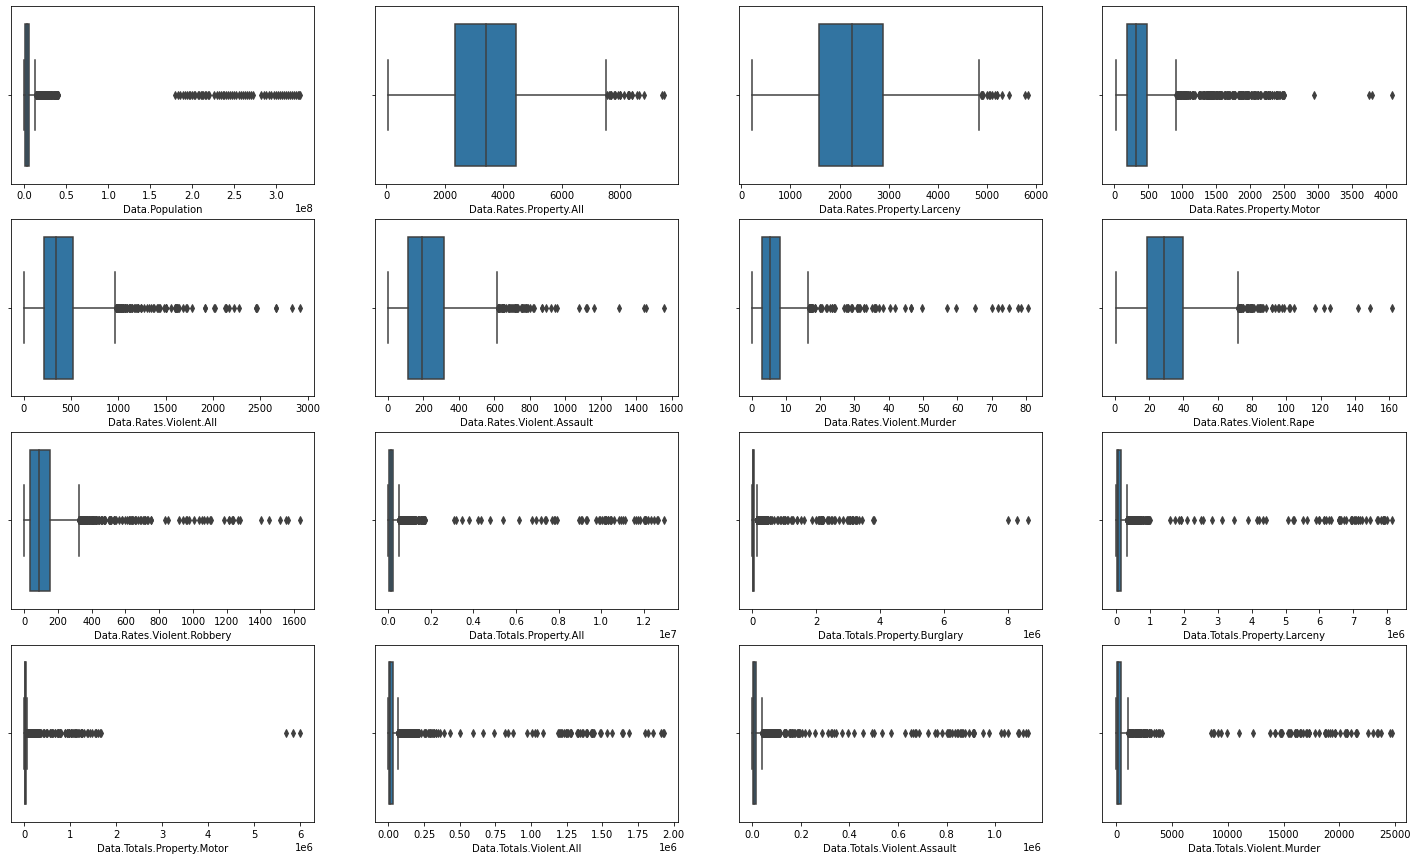

In [29]:
# Box Plot
import seaborn as sns
plt.figure(figsize=(25,15))
plt.subplot(4,4,1)
sns.boxplot(data['Data.Population'])
plt.subplot(4,4,2)
sns.boxplot(data['Data.Rates.Property.All'])
plt.subplot(4,4,3)
sns.boxplot(data['Data.Rates.Property.Larceny'])
plt.subplot(4,4,4)
sns.boxplot(data['Data.Rates.Property.Motor'])
plt.subplot(4,4,5)
sns.boxplot(data['Data.Rates.Violent.All'])
plt.subplot(4,4,6)
sns.boxplot(data['Data.Rates.Violent.Assault'])
plt.subplot(4,4,7)
sns.boxplot(data['Data.Rates.Violent.Murder'])
plt.subplot(4,4,8)
sns.boxplot(data['Data.Rates.Violent.Rape'])
plt.subplot(4,4,9)
sns.boxplot(data['Data.Rates.Violent.Robbery'])
plt.subplot(4,4,10)
sns.boxplot(data['Data.Totals.Property.All'])
plt.subplot(4,4,11)
sns.boxplot(data['Data.Totals.Property.Burglary'])
plt.subplot(4,4,12)
sns.boxplot(data['Data.Totals.Property.Larceny'])
plt.subplot(4,4,13)
sns.boxplot(data['Data.Totals.Property.Motor'])
plt.subplot(4,4,14)
sns.boxplot(data['Data.Totals.Violent.All'])
plt.subplot(4,4,15)
sns.boxplot(data['Data.Totals.Violent.Assault'])
plt.subplot(4,4,16)
sns.boxplot(data['Data.Totals.Violent.Murder'])


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


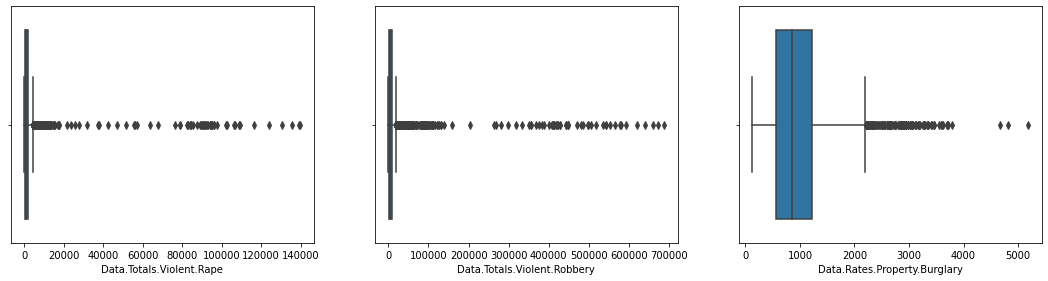

In [30]:
#boxplot
plt.figure(figsize=(25,20))
plt.subplot(4,4,1)
sns.boxplot(data['Data.Totals.Violent.Rape'])
plt.subplot(4,4,2)
sns.boxplot(data['Data.Totals.Violent.Robbery'])
plt.subplot(4,4,3)
sns.boxplot(data['Data.Rates.Property.Burglary'])
plt.savefig("outlier.jpg",format='jpg')

In [31]:
# Position of the Outlier
print(np.where(data['Data.Population']>1930))

(array([   0,    1,    2, ..., 3112, 3113, 3114]),)


In [32]:
#dealing with outliers
data['Data.Population']=data['Data.Population'].clip(lower=data['Data.Population'].quantile(0.05),upper=data['Data.Population'].quantile(0.95))
data['Data.Rates.Property.All']=data['Data.Rates.Property.All'].clip(lower=data['Data.Rates.Property.All'].quantile(0.05),upper=data['Data.Rates.Property.All'].quantile(0.95))
data['Data.Rates.Property.Burglary']=data['Data.Rates.Property.Burglary'].clip(lower=data['Data.Rates.Property.Burglary'].quantile(0.05),upper=data['Data.Rates.Property.Burglary'].quantile(0.95))
data['Data.Rates.Property.Larceny']=data['Data.Rates.Property.Larceny'].clip(lower=data['Data.Rates.Property.Larceny'].quantile(0.05),upper=data['Data.Rates.Property.Larceny'].quantile(0.95))
data['Data.Rates.Property.Motor']=data['Data.Rates.Property.Motor'].clip(lower=data['Data.Rates.Property.Motor'].quantile(0.05),upper=data['Data.Rates.Property.Motor'].quantile(0.95))
data['Data.Rates.Violent.All']=data['Data.Rates.Violent.All'].clip(lower=data['Data.Rates.Violent.All'].quantile(0.05),upper=data['Data.Rates.Violent.All'].quantile(0.95))
data['Data.Rates.Violent.Assault']=data['Data.Rates.Violent.Assault'].clip(lower=data['Data.Rates.Violent.Assault'].quantile(0.05),upper=data['Data.Rates.Violent.Assault'].quantile(0.95))
data['Data.Rates.Violent.Murder']=data['Data.Rates.Violent.Murder'].clip(lower=data['Data.Rates.Violent.Murder'].quantile(0.05),upper=data['Data.Rates.Violent.Murder'].quantile(0.95))
data['Data.Rates.Violent.Rape']=data['Data.Rates.Violent.Rape'].clip(lower=data['Data.Rates.Violent.Rape'].quantile(0.05),upper=data['Data.Rates.Violent.Rape'].quantile(0.95))
data['Data.Rates.Violent.Robbery']=data['Data.Rates.Violent.Robbery'].clip(lower=data['Data.Rates.Violent.Robbery'].quantile(0.05),upper=data['Data.Rates.Violent.Robbery'].quantile(0.95))
data['Data.Totals.Property.Burglary']=data['Data.Totals.Property.Burglary'].clip(lower=data['Data.Totals.Property.Burglary'].quantile(0.05),upper=data['Data.Totals.Property.Burglary'].quantile(0.95))
data['Data.Totals.Property.Larceny']=data['Data.Totals.Property.Larceny'].clip(lower=data['Data.Totals.Property.Larceny'].quantile(0.05),upper=data['Data.Totals.Property.Larceny'].quantile(0.95))
data['Data.Totals.Property.Motor']=data['Data.Totals.Property.Motor'].clip(lower=data['Data.Totals.Property.Motor'].quantile(0.05),upper=data['Data.Totals.Property.Motor'].quantile(0.95))
data['Data.Totals.Violent.All']=data['Data.Totals.Violent.All'].clip(lower=data['Data.Totals.Violent.All'].quantile(0.05),upper=data['Data.Totals.Violent.All'].quantile(0.95))
data['Data.Totals.Violent.Assault']=data['Data.Totals.Violent.Assault'].clip(lower=data['Data.Totals.Violent.Assault'].quantile(0.05),upper=data['Data.Totals.Violent.Assault'].quantile(0.95))
data['Data.Totals.Violent.Murder']=data['Data.Totals.Violent.Murder'].clip(lower=data['Data.Totals.Violent.Murder'].quantile(0.05),upper=data['Data.Totals.Violent.Murder'].quantile(0.95))
data['Data.Totals.Violent.Rape']=data['Data.Totals.Violent.Rape'].clip(lower=data['Data.Totals.Violent.Rape'].quantile(0.05),upper=data['Data.Totals.Violent.Rape'].quantile(0.95))
data['Data.Totals.Violent.Robbery']=data['Data.Totals.Violent.Robbery'].clip(lower=data['Data.Totals.Violent.Robbery'].quantile(0.05),upper=data['Data.Totals.Violent.Robbery'].quantile(0.95))


In [33]:
data.head()


,State,Year,Data.Population,Data.Rates.Property.All,Data.Rates.Property.Burglary,Data.Rates.Property.Larceny,Data.Rates.Property.Motor,Data.Rates.Violent.All,Data.Rates.Violent.Assault,Data.Rates.Violent.Murder,...,Data.Rates.Violent.Robbery,Data.Totals.Property.All,Data.Totals.Property.Burglary,Data.Totals.Property.Larceny,Data.Totals.Property.Motor,Data.Totals.Violent.All,Data.Totals.Violent.Assault,Data.Totals.Violent.Murder,Data.Totals.Violent.Rape,Data.Totals.Violent.Robbery
0,Alabama,1960,3266740.0,1035.4,355.9,613.89,103.67,186.6,138.1,12.4,...,27.5,33823,11626.0,19344.0,2853.0,6097.0,4512.0,406.0,281.0,898.0
1,Alabama,1961,3302000.0,985.5,339.3,613.89,103.67,168.5,128.9,12.9,...,19.1,32541,11205.0,18801.0,2535.0,5564.0,4255.0,427.0,252.0,630.0
2,Alabama,1962,3358000.0,1067.0,349.1,634.50,103.67,157.3,119.0,9.4,...,22.5,35829,11722.0,21306.0,2801.0,5283.0,3995.0,316.0,218.0,754.0
3,Alabama,1963,3347000.0,1150.9,376.9,683.40,103.67,182.7,142.1,10.2,...,24.7,38521,12614.0,22874.0,3033.0,6115.0,4755.0,340.0,192.0,828.0
4,Alabama,1964,3407000.0,1358.7,466.6,784.10,108.00,213.1,163.0,9.3,...,29.1,46290,15898.0,26713.0,3679.0,7260.0,5555.0,316.0,397.0,992.0


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3115 entries, 0 to 3114
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   State                          3115 non-null   object 
 1   Year                           3115 non-null   int64  
 2   Data.Population                3115 non-null   float64
 3   Data.Rates.Property.All        3115 non-null   float64
 4   Data.Rates.Property.Burglary   3115 non-null   float64
 5   Data.Rates.Property.Larceny    3115 non-null   float64
 6   Data.Rates.Property.Motor      3115 non-null   float64
 7   Data.Rates.Violent.All         3115 non-null   float64
 8   Data.Rates.Violent.Assault     3115 non-null   float64
 9   Data.Rates.Violent.Murder      3115 non-null   float64
 10  Data.Rates.Violent.Rape        3115 non-null   float64
 11  Data.Rates.Violent.Robbery     3115 non-null   float64
 12  Data.Totals.Property.All       3115 non-null   i

In [35]:
data.describe()

,Year,Data.Population,Data.Rates.Property.All,Data.Rates.Property.Burglary,Data.Rates.Property.Larceny,Data.Rates.Property.Motor,Data.Rates.Violent.All,Data.Rates.Violent.Assault,Data.Rates.Violent.Murder,Data.Rates.Violent.Rape,Data.Rates.Violent.Robbery,Data.Totals.Property.All,Data.Totals.Property.Burglary,Data.Totals.Property.Larceny,Data.Totals.Property.Motor,Data.Totals.Violent.All,Data.Totals.Violent.Assault,Data.Totals.Violent.Murder,Data.Totals.Violent.Rape,Data.Totals.Violent.Robbery
count,3115.000000,3.115000e+03,3115.000000,3115.000000,3115.000000,3115.000000,3115.000000,3115.000000,3115.000000,3115.000000,3115.000000,3.115000e+03,3115.000000,3115.000000,3115.000000,3115.000000,3115.000000,3115.000000,3115.000000,3115.000000
mean,1989.544141,4.995951e+06,3397.748045,950.501143,2241.980026,402.107653,380.121335,224.046087,6.011750,29.517014,107.919127,3.414501e+05,51766.178234,115053.688475,24016.483146,23629.445329,13378.830498,337.245393,1580.501059,7411.292648
std,17.299570,5.012980e+06,1443.143845,487.979633,909.501552,308.939338,216.002351,138.777553,3.425822,14.350716,83.187215,1.299392e+06,63798.092171,133495.381076,34420.272944,32027.817617,18122.460497,395.450486,1879.552728,11016.424067
min,1960.000000,5.735754e+05,601.160000,322.670000,613.890000,103.670000,73.900000,36.540000,1.500000,6.500000,12.900000,4.320000e+02,2855.500000,8911.900000,819.000000,587.400000,310.400000,13.000000,68.000000,86.000000
25%,1975.000000,1.279156e+06,2357.650000,561.800000,1575.450000,195.450000,217.200000,112.550000,3.100000,18.500000,37.300000,3.439550e+04,10171.500000,24880.000000,3514.000000,3318.000000,1926.000000,48.000000,328.000000,788.000000
50%,1990.000000,3.358000e+06,3420.200000,854.300000,2251.300000,315.400000,342.200000,195.800000,5.400000,28.800000,90.400000,1.015400e+05,28718.000000,67433.000000,10339.000000,11548.000000,6378.000000,186.000000,931.000000,3011.000000
75%,2005.000000,6.082836e+06,4433.900000,1218.200000,2876.900000,481.800000,518.250000,315.450000,8.400000,39.800000,152.200000,2.177235e+05,59577.000000,142757.000000,25299.500000,28804.000000,16949.000000,464.000000,1930.000000,7840.500000
max,2019.000000,1.930027e+07,5991.050000,2084.240000,3927.140000,1385.820000,846.110000,519.970000,13.200000,58.400000,315.680000,1.296112e+07,247571.700000,534705.700000,134304.000000,125975.300000,72976.100000,1519.900000,7347.800000,42565.100000


In [36]:
#k means clustering
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
from sklearn.cluster import KMeans

In [37]:
x = data.iloc[ :,1:20].values 
print(x)

[[1.96000e+03 3.26674e+06 1.03540e+03 ... 4.51200e+03 4.06000e+02
  2.81000e+02]
 [1.96100e+03 3.30200e+06 9.85500e+02 ... 4.25500e+03 4.27000e+02
  2.52000e+02]
 [1.96200e+03 3.35800e+06 1.06700e+03 ... 3.99500e+03 3.16000e+02
  2.18000e+02]
 ...
 [2.01700e+03 5.79315e+05 1.83040e+03 ... 1.02200e+03 1.50000e+01
  2.63000e+02]
 [2.01800e+03 5.77737e+05 1.78510e+03 ... 8.70000e+02 1.30000e+01
  2.43000e+02]
 [2.01900e+03 5.78759e+05 1.57110e+03 ... 8.54000e+02 1.30000e+01
  3.24000e+02]]


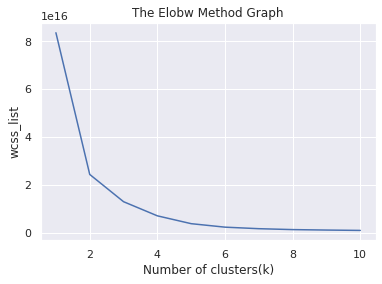

In [38]:
#finding optimal number of clusters using the elbow method  
from sklearn.cluster import KMeans  
wcss_list= []  #Initializing the list for the values of WCSS  
  
#Using for loop for iterations from 1 to 10.  
for i in range(1, 11):  
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)  
    kmeans.fit(x)  
    wcss_list.append(kmeans.inertia_)  
plt.plot(range(1, 11), wcss_list)  
plt.title('The Elobw Method Graph')  
plt.xlabel('Number of clusters(k)')  
plt.ylabel('wcss_list')  
plt.show()  

In [39]:
 #training the K-means model on a dataset  
kmeans = KMeans(n_clusters=3, init='k-means++', random_state= 42)  
y_predict= kmeans.fit_predict(x)  
y_predict

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

In [40]:
data['target']=y_predict

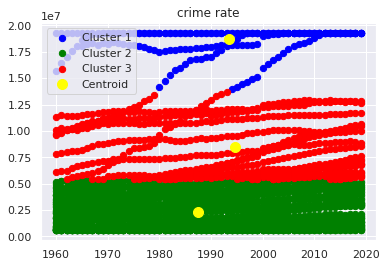

<Figure size 432x288 with 0 Axes>

In [41]:
#visulaizing the clusters  
plt.scatter(x[y_predict == 0,0], x[y_predict == 0, 1], s = 40, c = 'blue', label = 'Cluster 1') #for first cluster  
plt.scatter(x[y_predict == 1, 0], x[y_predict == 1, 1], s = 40, c = 'green', label = 'Cluster 2') #for second cluster 
plt.scatter(x[y_predict== 2, 0], x[y_predict == 2, 1], s = 40, c = 'red', label = 'Cluster 3') #for third cluster 
#plt.scatter(x[y_predict == 3, 0], x[y_predict == 3, 1], s = 40, c = 'cyan', label = 'Cluster 4') #for fourth cluster  
#plt.scatter(x[y_predict == 4, 0], x[y_predict == 4, 1], s = 40, c = 'magenta', label = 'Cluster 5') #for fifth cluster  


plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroid')   
plt.title('crime rate')  
plt.legend()  
plt.show()  
plt.savefig("clustering.jpg",format='jpg')

In [42]:
data.head()

,State,Year,Data.Population,Data.Rates.Property.All,Data.Rates.Property.Burglary,Data.Rates.Property.Larceny,Data.Rates.Property.Motor,Data.Rates.Violent.All,Data.Rates.Violent.Assault,Data.Rates.Violent.Murder,...,Data.Totals.Property.All,Data.Totals.Property.Burglary,Data.Totals.Property.Larceny,Data.Totals.Property.Motor,Data.Totals.Violent.All,Data.Totals.Violent.Assault,Data.Totals.Violent.Murder,Data.Totals.Violent.Rape,Data.Totals.Violent.Robbery,target
0,Alabama,1960,3266740.0,1035.4,355.9,613.89,103.67,186.6,138.1,12.4,...,33823,11626.0,19344.0,2853.0,6097.0,4512.0,406.0,281.0,898.0,1
1,Alabama,1961,3302000.0,985.5,339.3,613.89,103.67,168.5,128.9,12.9,...,32541,11205.0,18801.0,2535.0,5564.0,4255.0,427.0,252.0,630.0,1
2,Alabama,1962,3358000.0,1067.0,349.1,634.50,103.67,157.3,119.0,9.4,...,35829,11722.0,21306.0,2801.0,5283.0,3995.0,316.0,218.0,754.0,1
3,Alabama,1963,3347000.0,1150.9,376.9,683.40,103.67,182.7,142.1,10.2,...,38521,12614.0,22874.0,3033.0,6115.0,4755.0,340.0,192.0,828.0,1
4,Alabama,1964,3407000.0,1358.7,466.6,784.10,108.00,213.1,163.0,9.3,...,46290,15898.0,26713.0,3679.0,7260.0,5555.0,316.0,397.0,992.0,1


In [43]:
data.drop('State', axis = 1, inplace=True)

In [44]:
data.shape

(3115, 21)

In [45]:
data.head()

,Year,Data.Population,Data.Rates.Property.All,Data.Rates.Property.Burglary,Data.Rates.Property.Larceny,Data.Rates.Property.Motor,Data.Rates.Violent.All,Data.Rates.Violent.Assault,Data.Rates.Violent.Murder,Data.Rates.Violent.Rape,...,Data.Totals.Property.All,Data.Totals.Property.Burglary,Data.Totals.Property.Larceny,Data.Totals.Property.Motor,Data.Totals.Violent.All,Data.Totals.Violent.Assault,Data.Totals.Violent.Murder,Data.Totals.Violent.Rape,Data.Totals.Violent.Robbery,target
0,1960,3266740.0,1035.4,355.9,613.89,103.67,186.6,138.1,12.4,8.6,...,33823,11626.0,19344.0,2853.0,6097.0,4512.0,406.0,281.0,898.0,1
1,1961,3302000.0,985.5,339.3,613.89,103.67,168.5,128.9,12.9,7.6,...,32541,11205.0,18801.0,2535.0,5564.0,4255.0,427.0,252.0,630.0,1
2,1962,3358000.0,1067.0,349.1,634.50,103.67,157.3,119.0,9.4,6.5,...,35829,11722.0,21306.0,2801.0,5283.0,3995.0,316.0,218.0,754.0,1
3,1963,3347000.0,1150.9,376.9,683.40,103.67,182.7,142.1,10.2,6.5,...,38521,12614.0,22874.0,3033.0,6115.0,4755.0,340.0,192.0,828.0,1
4,1964,3407000.0,1358.7,466.6,784.10,108.00,213.1,163.0,9.3,11.7,...,46290,15898.0,26713.0,3679.0,7260.0,5555.0,316.0,397.0,992.0,1


In [46]:
X = data.drop('target', axis = 1)
Y = data['target']
Y

0       1
1       1
2       1
3       1
4       1
       ..
3110    1
3111    1
3112    1
3113    1
3114    1
Name: target, Length: 3115, dtype: int32

In [47]:
#gradient boosting
import random
from sklearn.model_selection import train_test_split
test=0.3
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3)

Accuracy: 1.0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


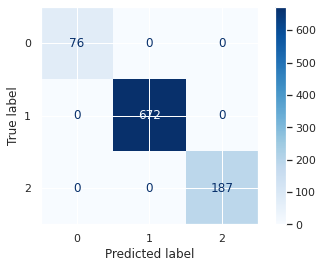

<Figure size 432x288 with 0 Axes>

In [48]:
from sklearn.ensemble import GradientBoostingClassifier
gradient_booster = GradientBoostingClassifier()
gradient_booster.fit(X_train,y_train)
y_pred=gradient_booster.predict(X_test) 
from sklearn.metrics import confusion_matrix,plot_confusion_matrix
from sklearn.metrics import confusion_matrix, accuracy_score
result = accuracy_score(y_test,y_pred)
print("Accuracy:",result)
gradient_booster.fit(X_train, y_train)
plot_confusion_matrix(gradient_booster,X_test,y_test,cmap=plt.cm.Blues,values_format = '.5g')
plt.show()
plt.savefig("GB confusion.jpg",format='jpg')

In [49]:
#KNN 
import numpy as nm  
import matplotlib.pyplot as mtp  
import pandas as pd  
 
# Splitting the dataset into training and test set.  
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(X, Y, test_size= 0.25, random_state=0)  
  
#feature Scaling  
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)  

In [50]:
#Fitting K-NN classifier to the training set  
from sklearn.neighbors import KNeighborsClassifier  
classifier= KNeighborsClassifier(n_neighbors=3, metric='minkowski', p=2 )  
classifier.fit(x_train, y_train) 

KNeighborsClassifier(n_neighbors=3)

In [51]:
#Predicting the test set result  
y_pred= classifier.predict(x_test)   


In [52]:
from sklearn.metrics import confusion_matrix, accuracy_score
#result = confusion_matrix(y_test, y_pred)
result = accuracy_score(y_test,y_pred)
print("Accuracy:",result)

Accuracy: 0.9858793324775353


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


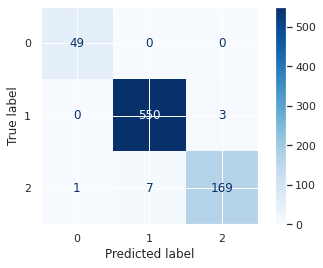

<Figure size 432x288 with 0 Axes>

In [53]:
plot_confusion_matrix(classifier,x_test,y_test,cmap=plt.cm.Blues,values_format = '.5g')
plt.show()
plt.savefig("DT confusion.jpg",format='jpg')